In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import symbols, simplify

In [13]:
r, n1, n2, d12, f= symbols('r n1 n2 d12 f')

In [14]:
eqR = -(n2-n1)/r
eqT = d12/n2
eqF1 = 1 / ((n2-1) * ((1/r) + (1/r) + (((n2-1)*d12) / (n2*r**2)) )) - f

In [15]:
sol = solve(eqF1,(r))
print(sol)

[f*(n2 - 1) - sqrt(f*n2*(d12 + f*n2))*(n2 - 1)/n2, f*(n2 - 1) + sqrt(f*n2*(d12 + f*n2))*(n2 - 1)/n2]


## 1 LENS SYSTEM

### lens1() function has the following inputs:
    alpha_0 = ray angle
    N1 = index of refraction of the medium behind the lens
    N2 = index of refraction of the lens  
    N3 = index of refraction of the medium in front of the lens
    R1 = radius of curvature of 1st plane of the lens 
    R2 = radius of curvature of 2nd plane of the lens 
    D01 = distance between the object and the 1st principal plane of the lens
    D12 = distance between the principal planes of the lens 
    D23 = length of ray after it exits the 2nd principal plane of lens 
    y_0 = object height

Note: Uncomment the commented lines to solve and print the focal length, and to see the x-axis tick lines for the focus, object and lenses.

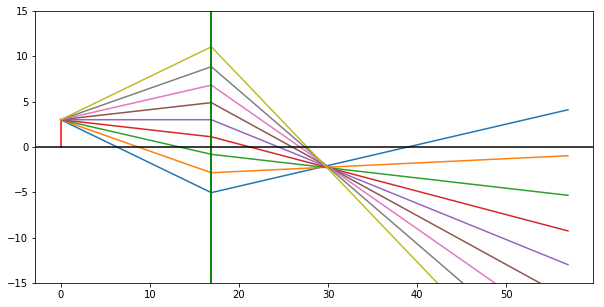

In [16]:
def lens1(alpha_0,N1=1.5,N2=1.0,N3=1.5,R1=-5,R2=5,D01=16.9,D12=0,D23=40,y_0=3):
#     F = 1 / ((N2-1) * (1/R1 - 1/R2 + (N2-1)*D12 / (N2*R1*R2)))
          
    num1 = {n2:N2, n1:N1, r:R1}
    R1eq = eqR.subs(num1)
    R1mat = np.array([[     1,     R1eq],
                      [     0,     1]])
    
    num2 = {n2:N2, d12:D12}
    T12eq = eqT.subs(num2)
    T12mat = np.array([[     1,     0],
                       [     T12eq,     1]])
    
    num3 = {n2:N3, n1:N2, r:R2}
    R2eq = eqR.subs(num3)
    R2mat = np.array([[     1,     R2eq],
                      [     0,     1]])
    
    num5 = {n2:N1, d12:D01}
    T01eq = eqT.subs(num5)
    T01mat = np.array([[     1,     0],
                       [     T01eq,     1]])
    
    num4 = {n2:N3, d12:D23}
    T23eq = eqT.subs(num4)
    T23mat = np.array([[     1,     0],
                       [     T23eq,     1]])

    objx = [0,0]
    objy = [0,y_0]
 
    d01x1 = D01
    d01y1 = D01*np.tan(alpha_0) + y_0
    
    N1mat = np.array([[N1*alpha_0],[d01y1]])        
    N1pmat = np.dot(R1mat,N1mat)                
    
    N2mat = np.dot(T12mat,N1pmat)               
    d12x2 = d01x1+D12
    d12y2 = N2mat[1]                        
    N2pmat = np.dot(R2mat,N2mat)
    
    N3mat = np.dot(T23mat,N2pmat)
    d23x3 = d12x2+D23
    d23y3 = N3mat[1]
    
    DX = [0,d01x1,d12x2,d23x3]
    DY = [y_0,d01y1,d12y2,d23y3]
    
    return objx,objy,DX,DY#,F

plt.figure(figsize=(10,5))
alphalist = [-80/180, -60/180, -40/180, -20/180, 0, 20/180, 40/180, 60/180, 80/180]
plt.plot(lens1(30/180)[0],lens1(30/180)[1], color='red')
for i in alphalist:
    plt.plot(lens1(i)[2],lens1(i)[3])
plt.axvline(x=lens1(30/180)[2][1], color='green')
plt.axvline(x=lens1(30/180)[2][2], color='green')
#plt.axvline(x=lens1(30/180)[2][1]-lens1(30/180)[4],ymin=0.49, ymax=0.51, color='black')
#plt.axvline(x=lens1(30/180)[2][2]+lens1(30/180)[4],ymin=0.49, ymax=0.51, color='black')
#plt.axvline(x=lens1(30/180)[2][1]-2*lens1(30/180)[4],ymin=0.49, ymax=0.51, color='black')
#plt.axvline(x=lens1(30/180)[2][2]+2*lens1(30/180)[4],ymin=0.49, ymax=0.51, color='black')
plt.axhline(y=0, color='black')
plt.ylim(-15,15)
#plt.xticks([lens1(30/180)[2][1],lens1(30/180)[2][2],lens1(30/180)[2][1]-lens1(30/180)[4],lens1(30/180)[2][1]-2*lens1(30/180)[4],lens1(30/180)[2][2]+lens1(30/180)[4],lens1(30/180)[2][2]+2*lens1(30/180)[4]])
#print('focal length = ',lens1(30/180)[4])
plt.show()


### lens1f() function has the following inputs:
    alpha_0 = ray angle
    N1 = index of refraction of the medium behind the lens
    N2 = index of refraction of the lens  
    N3 = index of refraction of the medium in front of the lens
    F = focal length of the lens 
    D01 = distance between the object and the 1st principal plane of the lens
    D12 = distance between the principal planes of the lens 
    D23 = length of ray after it exits the 2nd principal plane of lens 
    y_0 = object height

focal length =  8.333333333333332
R1 =  0
R2 =  0


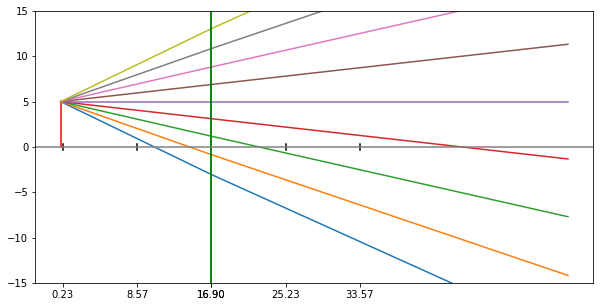

In [17]:
#1 lens system
def lens1f(alpha_0,N1=1,N2=1,N3=1,F=8.333333333333332, D01=16.9,D12=0,D23=40,y_0=5):
    numx = {f:F, n2:N2, d12:D12}
    R1 = sol[1].subs(numx)
    R2 = -R1
    
    num1 = {n2:N2, n1:N1, r:R1}
    R1eq = eqR.subs(num1)
    R1mat = np.array([[     1,     R1eq],
                      [     0,     1]])
    
    num2 = {n2:N2, d12:D12}
    T12eq = eqT.subs(num2)
    T12mat = np.array([[     1,     0],
                       [     T12eq,     1]])
    
    num3 = {n2:N3, n1:N2, r:R2}
    R2eq = eqR.subs(num3)
    R2mat = np.array([[     1,     R2eq],
                      [     0,     1]])
    
    num5 = {n2:N1, d12:D01}
    T01eq = eqT.subs(num5)
    T01mat = np.array([[     1,     0],
                       [     T01eq,     1]])
    
    num4 = {n2:N3, d12:D23}
    T23eq = eqT.subs(num4)
    T23mat = np.array([[     1,     0],
                       [     T23eq,     1]])

    #Set (x=0,y=0) as object position and (x=0,y=y_0) as object position with height
    objx = [0,0]
    objy = [0,y_0]
 
    d01x1 = D01
    d01y1 = D01*np.tan(alpha_0) + y_0
    
    N1mat = np.array([[N1*alpha_0],[d01y1]])       
    N1pmat = np.dot(R1mat,N1mat)               
    
    N2mat = np.dot(T12mat,N1pmat)                
    d12x2 = d01x1+D12
    d12y2 = N2mat[1]                         
    N2pmat = np.dot(R2mat,N2mat)
    
    N3mat = np.dot(T23mat,N2pmat)
    d23x3 = d12x2+D23
    d23y3 = N3mat[1]
    
    DX = [0,d01x1,d12x2,d23x3]
    DY = [y_0,d01y1,d12y2,d23y3]
    
    return objx,objy,DX,DY,F,R1,R2

plt.figure(figsize=(10,5))
alphalist = [-80/180, -60/180, -40/180, -20/180, 0, 20/180, 40/180, 60/180, 80/180]
plt.plot(lens1f(30/180)[0],lens1f(30/180)[1], color='red')
for i in alphalist:
    plt.plot(lens1f(i)[2],lens1f(i)[3])
plt.axvline(x=lens1f(30/180)[2][1], color='green')
plt.axvline(x=lens1f(30/180)[2][2], color='green')
plt.axvline(x=lens1f(30/180)[2][1]-lens1f(30/180)[4],ymin=0.49, ymax=0.51, color='black')
plt.axvline(x=lens1f(30/180)[2][2]+lens1f(30/180)[4],ymin=0.49, ymax=0.51, color='black')
plt.axvline(x=lens1f(30/180)[2][1]-2*lens1f(30/180)[4],ymin=0.49, ymax=0.51, color='black')
plt.axvline(x=lens1f(30/180)[2][2]+2*lens1f(30/180)[4],ymin=0.49, ymax=0.51, color='black')
plt.axhline(y=0, color='gray')
plt.ylim(-15,15)
plt.xticks([lens1f(30/180)[2][1],lens1f(30/180)[2][2],lens1f(30/180)[2][1]-lens1f(30/180)[4],lens1f(30/180)[2][1]-2*lens1f(30/180)[4],lens1f(30/180)[2][2]+lens1f(30/180)[4],lens1f(30/180)[2][2]+2*lens1f(30/180)[4]])
print('focal length = ',lens1f(30/180)[4])
print('R1 = ',lens1f(30/180)[5])
print('R2 = ',lens1f(30/180)[6])
#plt.savefig('raytrace.pdf')
plt.show()


## 2 LENS SYSTEM

### lens2() function has the following inputs:
    alpha_0 = ray angle
    N1 = index of refraction of medium behind lens 1
    N2 = index of refraction of lens 1 
    N3 = index of refraction of the medium between the lenses 
    N4 = index of refraction of lens 2 
    N5 = index of refraction of the medium in front of lens 2 
    R1 = radius of curvature of 1st plane of lens 1
    R2 = radius of curvature of 2nd plane of lens 1
    R3 = radius of curvature of 1st plane of lens 2
    R4 = radius of curvature of 2nd plane of lens 2
    D01 = distance between the object and the 1st principal plane of lens 1
    D12 = distance between the principal planes of lens 1
    D23 = distance between the 2nd principal plane of lens 1 and the 1st principal plane of lens 2
    D34 = distance between the principal planes of lens 2
    D45 = length of ray after it exits the 2nd principal plane of lens 2
    y_0 = object height

Note: Uncomment the commented lines to solve and print the focal length, and to see the x-axis tick lines for the focus, object and lenses.

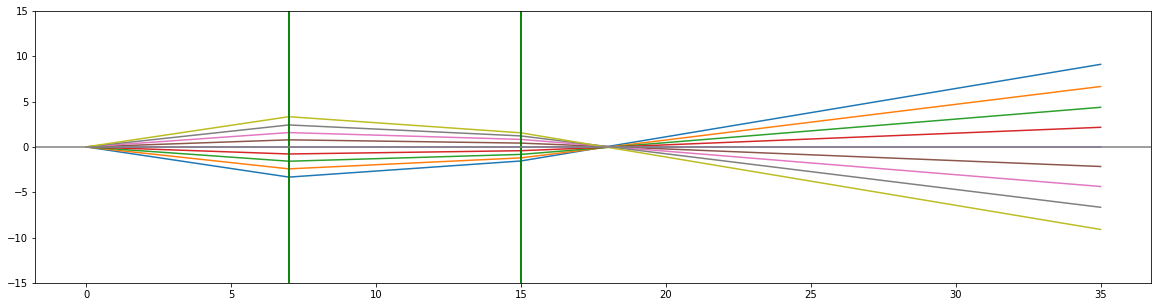

In [18]:
def lens2(alpha_0,N1=1,N2=1.5,N3=1,N4=1.5,N5=1,R1=5,R2=-5,R3=5,R4=-5,D01=7,D12=0,D23=8,D34=0,D45=20,y_0=0):
    
    #F1 = 1 / ((N2-1) * ((1/R1) - (1/R2) + (((N2-1)*D12) / (N2*R1*R2)) ))
    #F2 = 1 / ((N4-1) * ((1/R3) - (1/R4) + (((N4-1)*D34) / (N4*R3*R4)) ))
    #F = 1 / (1/F1 + 1/F2 - D23/(F1*F2))
    
    num1 = {n2:N1, d12:D01}
    T01eq = eqT.subs(num1)
    T01mat = np.array([[     1,     0],
                       [     T01eq,     1]])
    
    num2 = {n2:N2, n1:N1, r:R1}
    R1eq = eqR.subs(num2)
    R1mat = np.array([[     1,     R1eq],
                      [     0,     1]])
    
    num3 = {n2:N2, d12:D12}
    T12eq = eqT.subs(num3)
    T12mat = np.array([[     1,     0],
                       [     T12eq,     1]])
    
    num4 = {n2:N3, n1:N2, r:R2}
    R2eq = eqR.subs(num4)
    R2mat = np.array([[     1,     R2eq],
                      [     0,     1]])

    num5 = {n2:N3, d12:D23}
    T23eq = eqT.subs(num5)
    T23mat = np.array([[     1,     0],
                       [     T23eq,     1]])
    
    num6 = {n2:N4, n1:N3, r:R3}
    R3eq = eqR.subs(num6)
    R3mat = np.array([[     1,     R3eq],
                      [     0,     1]])
    
    num7 = {n2:N4, d12:D34}
    T34eq = eqT.subs(num7)
    T34mat = np.array([[     1,     0],
                       [     T34eq,     1]])
    
    num8 = {n2:N5, n1:N4, r:R4}
    R4eq = eqR.subs(num8)
    R4mat = np.array([[     1,     R4eq],
                      [     0,     1]])
    
    
    num9 = {n2:N5, d12:D45}
    T45eq = eqT.subs(num9)
    T45mat = np.array([[     1,     0],
                       [     T45eq,     1]])

    objx = [0,0]
    objy = [0,y_0]
 
    d01x1 = D01
    d01y1 = D01*np.tan(alpha_0) + y_0
    
    N1mat = np.array([[N1*alpha_0],[d01y1]])      
    N1pmat = np.dot(R1mat,N1mat)                 
    
    N2mat = np.dot(T12mat,N1pmat)                 
    d12x2 = d01x1+D12
    d12y2 = N2mat[1]
    N2pmat = np.dot(R2mat,N2mat)
    
    N3mat = np.dot(T23mat,N2pmat)
    d23x3 = d12x2+D23
    d23y3 = N3mat[1]
    N3pmat = np.dot(R3mat,N3mat)
    
    N4mat = np.dot(T34mat,N3pmat)
    d34x4 = d23x3+D34
    d34y4 = N4mat[1]
    N4pmat = np.dot(R4mat,N4mat)
    
    N5mat = np.dot(T45mat,N4pmat)
    d45x5 = d34x4+D45
    d45y5 = N5mat[1]
    
    DX = [0,d01x1,d12x2,d23x3,d34x4,d45x5]
    DY = [y_0,d01y1,d12y2,d23y3,d34y4,d45y5]
    
    return objx,objy,DX,DY#,F1,F2

plt.figure(figsize=(20,5))
alphalist = [-80/180, -60/180, -40/180, -20/180, 0, 20/180, 40/180, 60/180, 80/180]
plt.plot(lens2(30/180)[0],lens2(30/180)[1], color='red')
for i in alphalist:
    plt.plot(lens2(i)[2],lens2(i)[3])
plt.axvline(x=lens2(30/180)[2][1], color='green')
plt.axvline(x=lens2(30/180)[2][2], color='green')
plt.axvline(x=lens2(30/180)[2][3], color='green')
plt.axvline(x=lens2(30/180)[2][4], color='green')
#plt.xticks([0,lens2(30/180)[2][1],lens2(30/180)[2][1]-lens2(30/180)[4],lens2(30/180)[2][2],lens2(30/180)[2][2]+lens2(30/180)[4],lens2(30/180)[2][3],lens2(30/180)[2][3]-lens2(30/180)[5],lens2(30/180)[2][4],lens2(30/180)[2][4]+lens2(30/180)[5]])
#print('focal length of L1 = ',lens2(30/180)[4])
#print('focal length of L2 = ',lens2(30/180)[5])
plt.axhline(y=0, color='gray')
plt.ylim(-15,15)
plt.show()


### lens2f() function has the following inputs:
    alpha_0 = ray angle
    N1 = index of refraction of medium behind lens 1
    N2 = index of refraction of lens 1 
    N3 = index of refraction of the medium between the lenses 
    N4 = index of refraction of lens 2 
    N5 = index of refraction of the medium in front of lens 2 
    F1 = focal length of lens 1
    F2 = focal length of lens 2
    D01 = distance between the object and the 1st principal plane of lens 1
    D12 = distance between the principal planes of lens 1
    D23 = distance between the 2nd principal plane of lens 1 and the 1st principal plane of lens 2
    D34 = distance between the principal planes of lens 2
    D45 = length of ray after it exits the 2nd principal plane of lens 2
    y_0 = object height

focal length of L1 =  7
focal length of L2 =  5
R1 =  4.20000000000000
R2 =  -4.20000000000000
R3 =  3.00000000000000
R4 =  -3.00000000000000


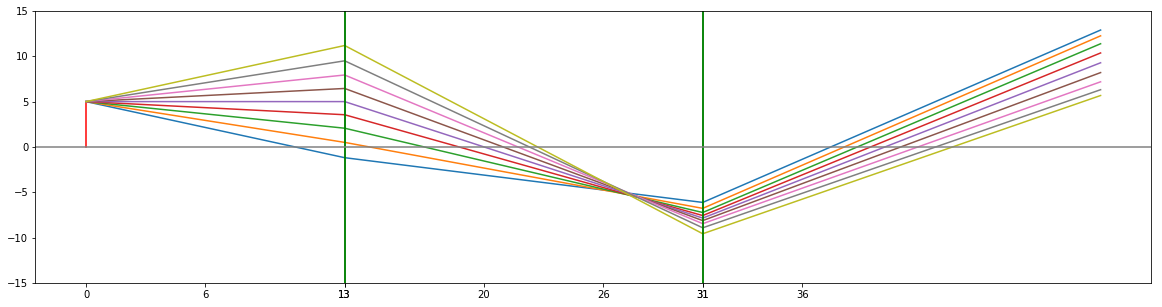

In [19]:
def lens2f(alpha_0,N1=1,N2=1.3,N3=1,N4=1.3,N5=1,F1=7,F2=5,D01=13,D12=0,D23=18,D34=0,D45=20,y_0=5):
    numx = {f:F1, n2:N2, d12:D12}
    R1 = sol[1].subs(numx)
    R2 = -R1
    
    numy = {f:F2, n2:N4, d12:D34}
    R3 = sol[1].subs(numy)
    R4 = -R3
    
    num1 = {n2:N1, d12:D01}
    T01eq = eqT.subs(num1)
    T01mat = np.array([[     1,     0],
                       [     T01eq,     1]])
    
    num2 = {n2:N2, n1:N1, r:R1}
    R1eq = eqR.subs(num2)
    R1mat = np.array([[     1,     R1eq],
                      [     0,     1]])
    
    num3 = {n2:N2, d12:D12}
    T12eq = eqT.subs(num3)
    T12mat = np.array([[     1,     0],
                       [     T12eq,     1]])
    
    num4 = {n2:N3, n1:N2, r:R2}
    R2eq = eqR.subs(num4)
    R2mat = np.array([[     1,     R2eq],
                      [     0,     1]])

    num5 = {n2:N3, d12:D23}
    T23eq = eqT.subs(num5)
    T23mat = np.array([[     1,     0],
                       [     T23eq,     1]])
    
    num6 = {n2:N4, n1:N3, r:R3}
    R3eq = eqR.subs(num6)
    R3mat = np.array([[     1,     R3eq],
                      [     0,     1]])
    
    num7 = {n2:N4, d12:D34}
    T34eq = eqT.subs(num7)
    T34mat = np.array([[     1,     0],
                       [     T34eq,     1]])
    
    num8 = {n2:N5, n1:N4, r:R4}
    R4eq = eqR.subs(num8)
    R4mat = np.array([[     1,     R4eq],
                      [     0,     1]])
    
    
    num9 = {n2:N5, d12:D45}
    T45eq = eqT.subs(num9)
    T45mat = np.array([[     1,     0],
                       [     T45eq,     1]])

    #Set (x=0,y=0) as object position and (x=0,y=y_0) as object position with height
    objx = [0,0]
    objy = [0,y_0]
 
    d01x1 = D01
    d01y1 = D01*np.tan(alpha_0) + y_0
    
    N1mat = np.array([[N1*alpha_0],[d01y1]])    
    N1pmat = np.dot(R1mat,N1mat)                  
    
    N2mat = np.dot(T12mat,N1pmat)                 
    d12x2 = d01x1+D12
    d12y2 = N2mat[1]
    N2pmat = np.dot(R2mat,N2mat)
    
    N3mat = np.dot(T23mat,N2pmat)
    d23x3 = d12x2+D23
    d23y3 = N3mat[1]
    N3pmat = np.dot(R3mat,N3mat)
    
    N4mat = np.dot(T34mat,N3pmat)
    d34x4 = d23x3+D34
    d34y4 = N4mat[1]
    N4pmat = np.dot(R4mat,N4mat)
    
    N5mat = np.dot(T45mat,N4pmat)
    d45x5 = d34x4+D45
    d45y5 = N5mat[1]
    
    DX = [0,d01x1,d12x2,d23x3,d34x4,d45x5]
    DY = [y_0,d01y1,d12y2,d23y3,d34y4,d45y5]
    
    return objx,objy,DX,DY,F1,F2,R1,R2,R3,R4

plt.figure(figsize=(20,5))
alphalist = [-80/180, -60/180, -40/180, -20/180, 0, 20/180, 40/180, 60/180, 80/180]
plt.plot(lens2f(30/180)[0],lens2f(30/180)[1], color='red')
for i in alphalist:
    plt.plot(lens2f(i)[2],lens2f(i)[3])
plt.axvline(x=lens2f(30/180)[2][1], color='green')
plt.axvline(x=lens2f(30/180)[2][2], color='green')
plt.axvline(x=lens2f(30/180)[2][3], color='green')
plt.axvline(x=lens2f(30/180)[2][4], color='green') 
plt.xticks([0,lens2f(30/180)[2][1],lens2f(30/180)[2][1]-lens2f(30/180)[4],lens2f(30/180)[2][2],lens2f(30/180)[2][2]+lens2f(30/180)[4],lens2f(30/180)[2][3],lens2f(30/180)[2][3]-lens2f(30/180)[5],lens2f(30/180)[2][4],lens2f(30/180)[2][4]+lens2f(30/180)[5]])
print('focal length of L1 = ',lens2f(30/180)[4])
print('focal length of L2 = ',lens2f(30/180)[5])
print('R1 = ',lens2f(30/180)[6])
print('R2 = ',lens2f(30/180)[7])
print('R3 = ',lens2f(30/180)[8])
print('R4 = ',lens2f(30/180)[9])
plt.axhline(y=0, color='gray')
plt.ylim(-15,15)
plt.show()